# Daily Climate Data in New Delhi, India

This dataset provides data from 1st January 2017 to 24th April 2017 in the city of Delhi, India. It was obtained from https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data. There are 5 variables in which 4 of them are meantemp, humidity, wind_speed, meanpressure. The remaining variable contains date information in the format of YYYY-MM-DD. 

The meantemp variable lists mean temperature averaged out from multiple 3 hour intervals per day. The humidity variable contains humidity value of the day (in grams of water vapor per cubic meter of air). The wind_speed variable provides the information of wind speed measured in kmph. The meanpressure variable is a pressure reading of the weather (in atm).

## Exploratory Data Analysis (EDA)

In [33]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

#Reading the dataset
delhi_df = pd.read_csv(r'C:\Users\User\Desktop\DataCamp\Python\Projects\Voluntary Projects\14. Daily Climate (Time Series)\DailyDelhiClimateTest.csv')
display(delhi_df.head())

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [34]:
#Finding the total number of observations
print('Total number of observations: {} observations'.format(delhi_df.shape[0]))

Total number of observations: 114 observations


In [35]:
#Checking the data type of each variable
print(delhi_df.dtypes)

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object


The date variable requires data type conversion from object to datetime64. The rest are already in their proper data type.

In [36]:
#Date's data type conversion
delhi_df['date'] = pd.to_datetime(delhi_df['date'])

#Checking on the conversion
print(delhi_df.dtypes)

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object


The variables are finally in their appropriate data type.

In [37]:
#Finding if there's any duplicate
print('Number of duplicate in the dataset: {}'.format(delhi_df.duplicated().sum()))

Number of duplicate in the dataset: 0


Looks like there's no duplicate in the dataframe. This means the dataframe contains daily observations of climate data in New Delhi, India.

In [38]:
#Checking if there's any missing value
print(delhi_df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


There's no missing value in the dataframe.

In [39]:
#Setting date as the dataframe index
delhi_df = delhi_df.set_index('date')

#Displaying the indexed dataframe
display(delhi_df.head())

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [40]:
#Extracting the information of each variable
print(delhi_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB
None


## Data Visualization

### Distribution of Data

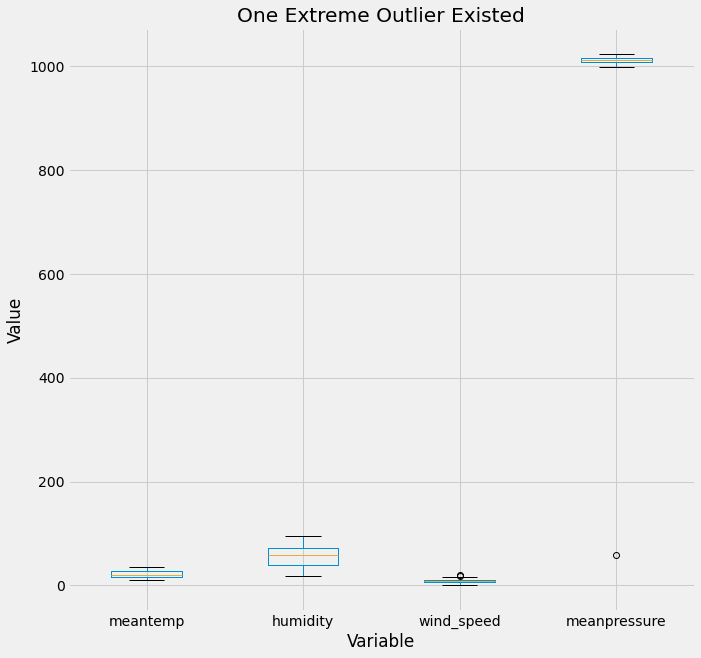

In [41]:
#Checking for any outlier
fig, ax1 = plt.subplots(figsize=(10,10))
ax1 = delhi_df.boxplot()
ax1.set_xlabel('Variable')
ax1.set_ylabel('Value')
ax1.set_title('One Extreme Outlier Existed')
plt.show()

There are one extreme outlier and two not-so-extreme outliers existed in the meanpressure variable. While the not-so-extreme outliers would not severely affecting the analysis, the extreme outlier should be removed since it can affect the data distribution and distort the analysis result. 

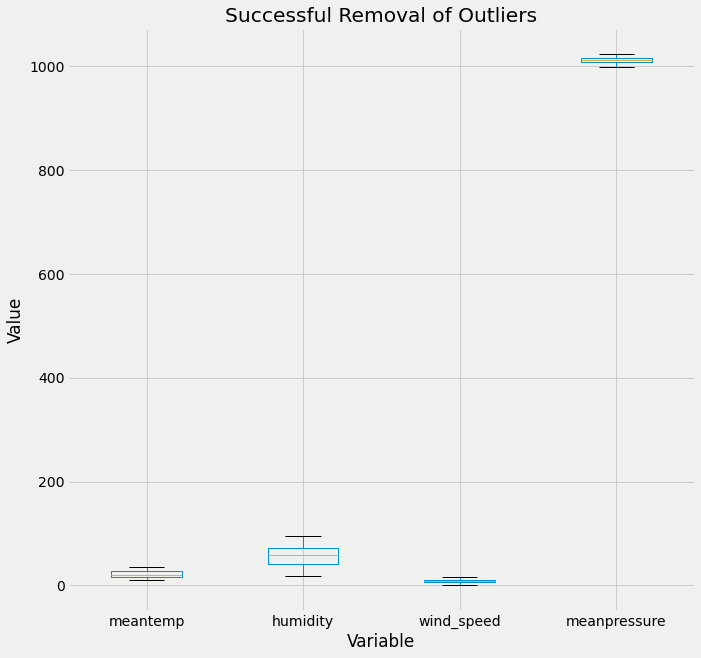

In [42]:
#Removing outliers
Q1 = delhi_df.quantile(0.25)
Q3 = delhi_df.quantile(0.75)
IQR = Q3 - Q1
delhi_df = delhi_df[~((delhi_df < (Q1 - 1.5 * IQR)) | (delhi_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#Validating the removal of outliers
fig, ax2 = plt.subplots(figsize=(10,10))
ax2 = delhi_df.boxplot()
ax2.set_xlabel('Variable')
ax2.set_ylabel('Value')
ax2.set_title('Successful Removal of Outliers')
plt.show()

In [43]:
#Determining the remaining observations left after the removal of outliers
print('Number of remaining observations: {}'.format(delhi_df.shape[0]))

Number of remaining observations: 111


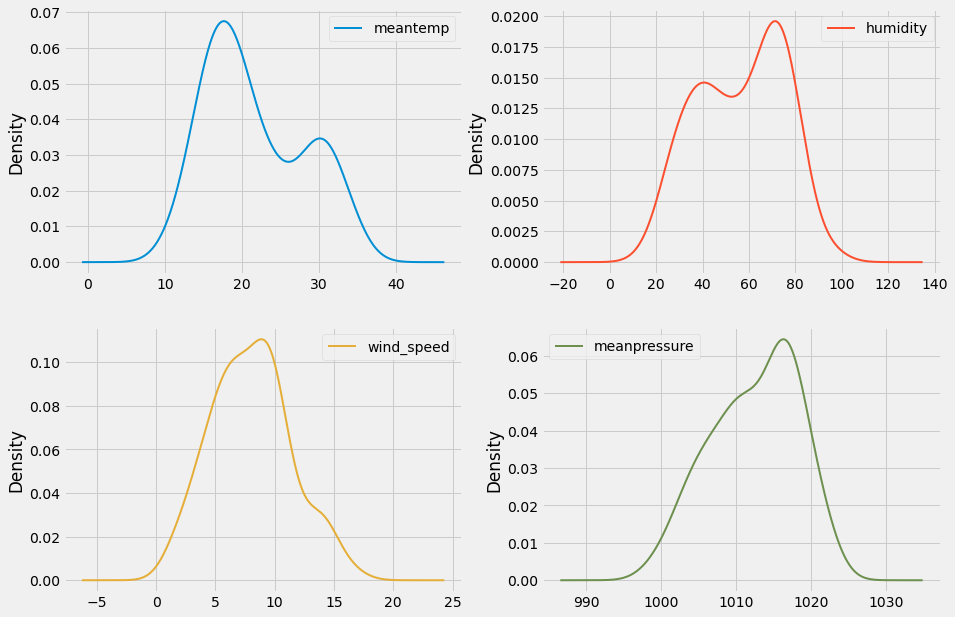

In [44]:
#Inspecting the underlying distribution of data
ax3 = delhi_df.plot(subplots=True, layout=(2,2), figsize=(14,10), kind='density', linewidth=2, sharex=False)
plt.show()

Based on the meantemp density curve above, the distribution appears to be bimodal (two-peak density curve shape) with the main (highest) peak roughly at 17°C and the lower peak roughly at 30°C which means the first mode (most frequent) value was at 17°C whereas the second mode (second most frequent) value was at 30°C. Referring to the main peak, the distribution is slightly right-skewed which means the mean is greater than the median.

Similarly, the distribution of humidity values is bimodal with the main peak roughly at 70 g/m^3 and the lower peak roughly at 40 g/m^3 which means the first mode value was at 70 g/m^3 whereas the second mode value was at 40 g/m^3.

Looking at the wind_speed density curve, it can be seen that the data distribution is normal. The mode is roughly at 8 kmph.

The meanpressure data distribution also seems to be normally distributed but slightly left-skewed which means the mean is less than the median. The mode is roughly at 1016 atm.

### Plotting Multiple Time Series

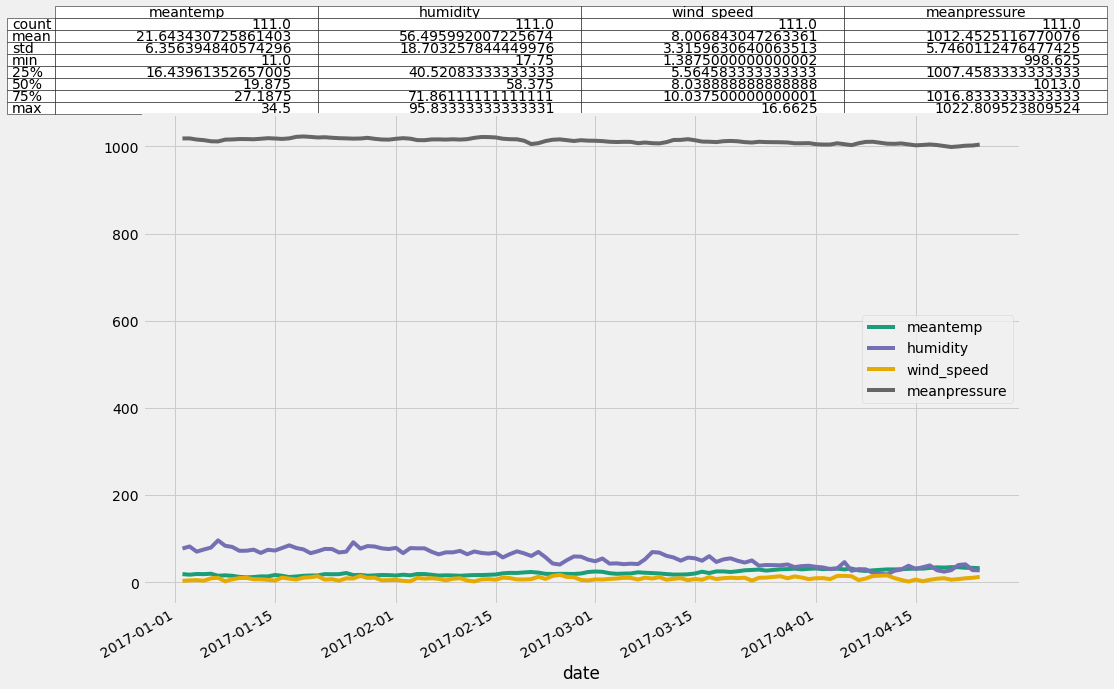

In [45]:
#Plotting the time series data
plt.style.use('fivethirtyeight')
ax4 = delhi_df.plot(colormap='Dark2', figsize=(14,10))
delhi_df_summary = delhi_df.describe()

ax4.table(cellText=delhi_df_summary.values, colWidths=[0.3]*len(delhi_df.columns), rowLabels=delhi_df_summary.index, \
         colLabels=delhi_df_summary.columns, loc='top')
plt.show()

The patterns of several line plots cannot be distinguished since each variable has their own amplitude and scale. Therefore, it is better to facet the plots (plot each variable individually).

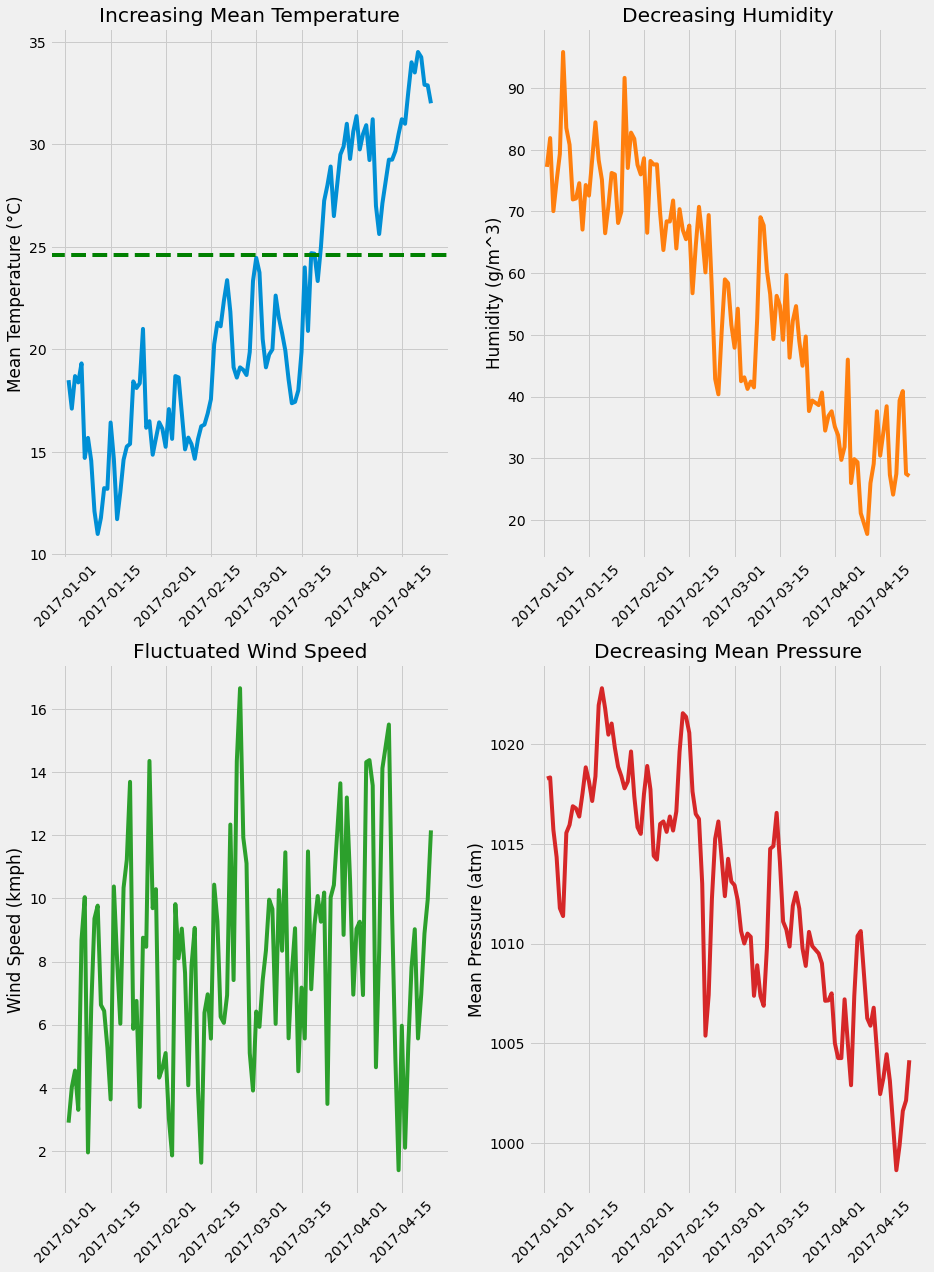

In [46]:
#Plotting facet plots
fig, axs = plt.subplots(2, 2, figsize=(14,20))

axs[0,0].plot(delhi_df.index, delhi_df['meantemp'])
plt.setp(axs[0,0].get_xticklabels(), rotation=45)
axs[0,0].set_title('Increasing Mean Temperature')
axs[0,0].set(ylabel='Mean Temperature (°C)')
axs[0,0].axhline(24.6, color='green', linestyle='--')

axs[0, 1].plot(delhi_df.index, delhi_df['humidity'], 'tab:orange')
plt.setp(axs[0,1].get_xticklabels(), rotation=45)
axs[0, 1].set_title('Decreasing Humidity')
axs[0,1].set(ylabel='Humidity (g/m^3)')

axs[1, 0].plot(delhi_df.index, delhi_df['wind_speed'], 'tab:green')
plt.setp(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 0].set_title('Fluctuated Wind Speed')
axs[1, 0].set(ylabel='Wind Speed (kmph)')

axs[1, 1].plot(delhi_df.index, delhi_df['meanpressure'], 'tab:red')
plt.setp(axs[1, 1].get_xticklabels(), rotation=45)
axs[1, 1].set_title('Decreasing Mean Pressure')
axs[1, 1].set(ylabel='Mean Pressure (atm)')

plt.show()

The mean temperature was at the lowest in mid January 2017 before increasing quite drastically. The explanation of this increase might be because of the approaching summer. Note that the horizontal dotted green line represents the average annual temperature in New Delhi, India (Data obtained from https://en.climate-data.org/asia/india/delhi/new-delhi-30/. 

Inversely, the humidity level decreases with time. There was a lot of noise or fluctuations in the wind_speed variable whereas the mean pressure was dropping with time.

### Moving Average

Moving average is used to smooth-out short term fluctuation, remove outliers and highlight long-term trend. Since it was quite difficult to analyze the previous facet plots due to short-term fluctuations, lets use moving average to analyze weekly climate data instead of daily one.

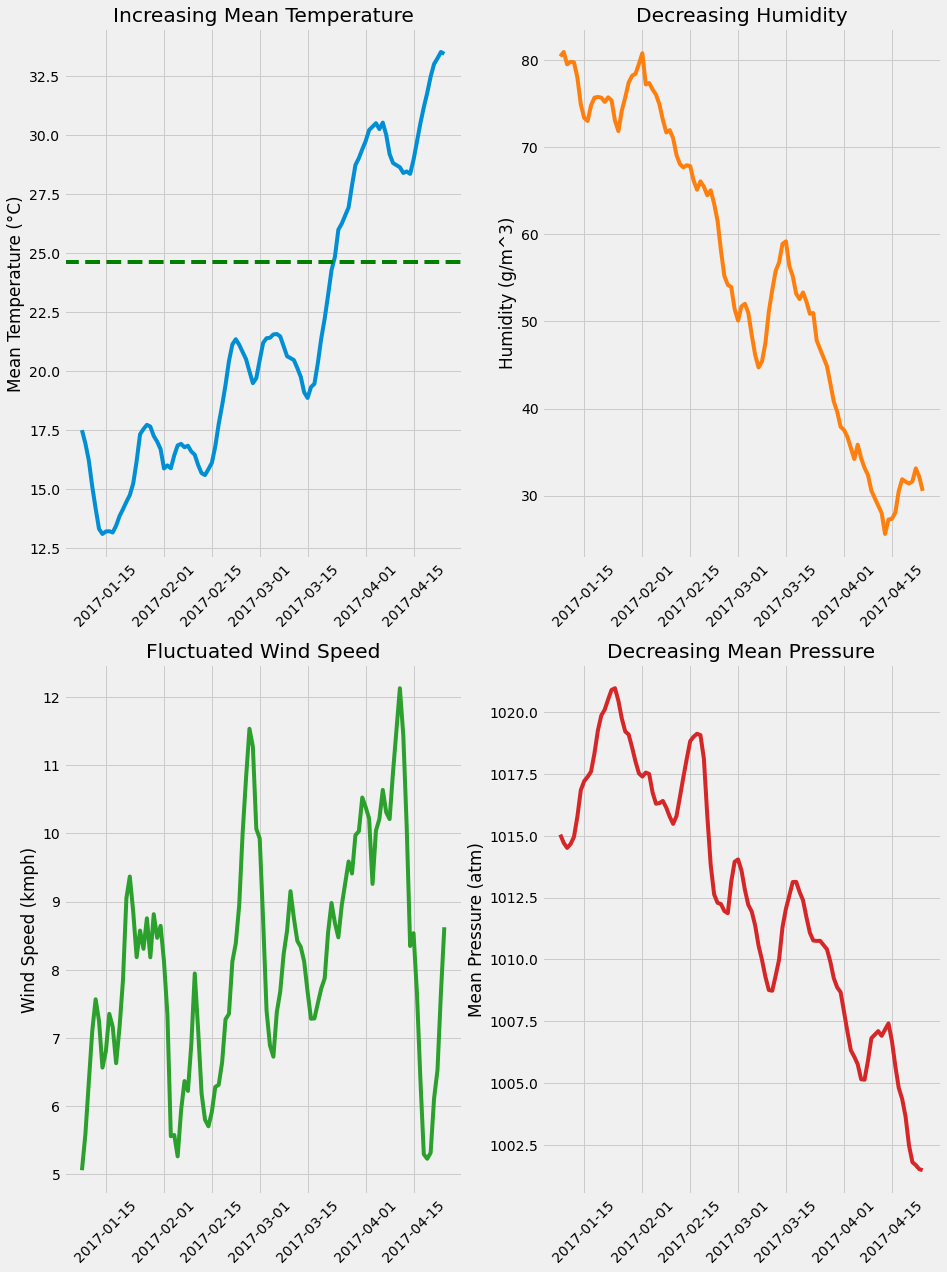

In [47]:
#Take rolling mean of daily data and specify a window of 7 to obtain weekly moving averages
weekly_delhi = delhi_df.rolling(window=7).mean()
fig, ax5 = plt.subplots(2, 2, figsize=(14,20))

ax5[0,0].plot(weekly_delhi.index, weekly_delhi['meantemp'])
plt.setp(ax5[0,0].get_xticklabels(), rotation=45)
ax5[0,0].set_title('Increasing Mean Temperature')
ax5[0,0].set(ylabel='Mean Temperature (°C)')
ax5[0,0].axhline(24.6, color='green', linestyle='--')

ax5[0, 1].plot(weekly_delhi.index, weekly_delhi['humidity'], 'tab:orange')
plt.setp(ax5[0,1].get_xticklabels(), rotation=45)
ax5[0, 1].set_title('Decreasing Humidity')
ax5[0,1].set(ylabel='Humidity (g/m^3)')

ax5[1, 0].plot(weekly_delhi.index, weekly_delhi['wind_speed'], 'tab:green')
plt.setp(ax5[1, 0].get_xticklabels(), rotation=45)
ax5[1, 0].set_title('Fluctuated Wind Speed')
ax5[1, 0].set(ylabel='Wind Speed (kmph)')

ax5[1, 1].plot(weekly_delhi.index, weekly_delhi['meanpressure'], 'tab:red')
plt.setp(ax5[1, 1].get_xticklabels(), rotation=45)
ax5[1, 1].set_title('Decreasing Mean Pressure')
ax5[1, 1].set(ylabel='Mean Pressure (atm)')

plt.show()

Now the plots look clearer with the usage of weekly data.

## Time Series Decomposition (Seasonal & Trend)

### Seasonality

In [48]:
#Sort the index first
delhi_df = delhi_df.sort_index()

#Initialize empty dictionary
dict_delhi = {}

#Get the name of each time series in the dataframe
dict_names = delhi_df.columns
print(dict_names)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


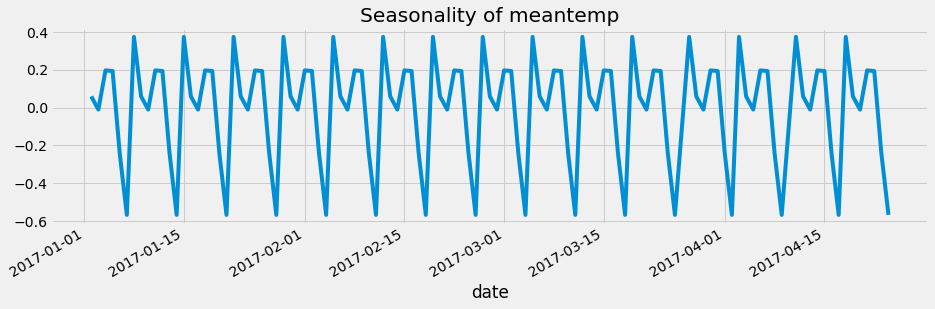

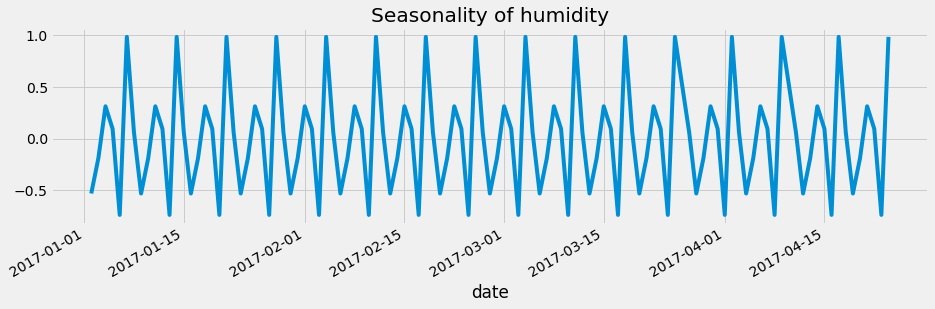

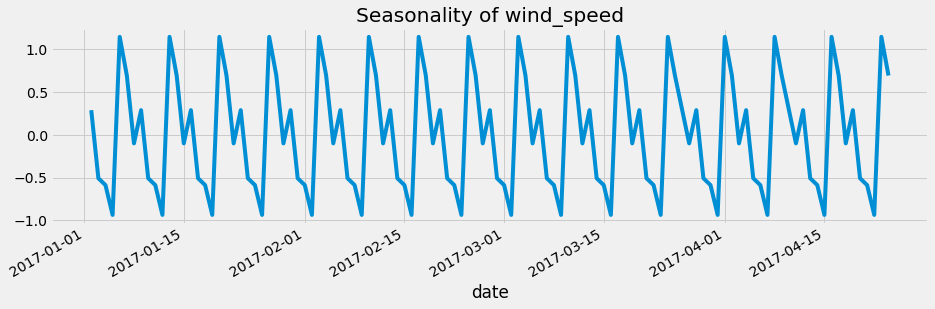

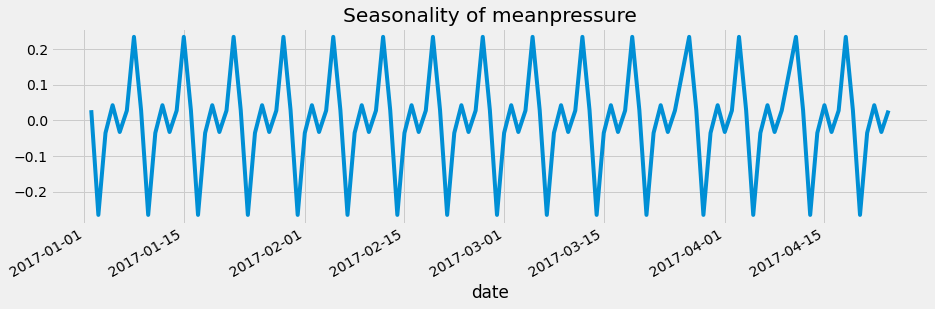

In [49]:
#Run time series decomposition on each time series of the DataFrame
for ts in dict_names:
    ts_decomposition = sm.tsa.seasonal_decompose(delhi_df[ts], model='additive', period=7)
    dict_delhi[ts] = ts_decomposition

dict_seasonal = {}

for ts in dict_names:
    dict_seasonal[ts] = dict_delhi[ts].seasonal
    ax = dict_seasonal[ts].plot(figsize=(14,4))
    ax.set_title('Seasonality of {}'.format(ts))
    plt.show()

Referring to the above plots, it looks like all variables have the similar seasonality every week. 

### Trend

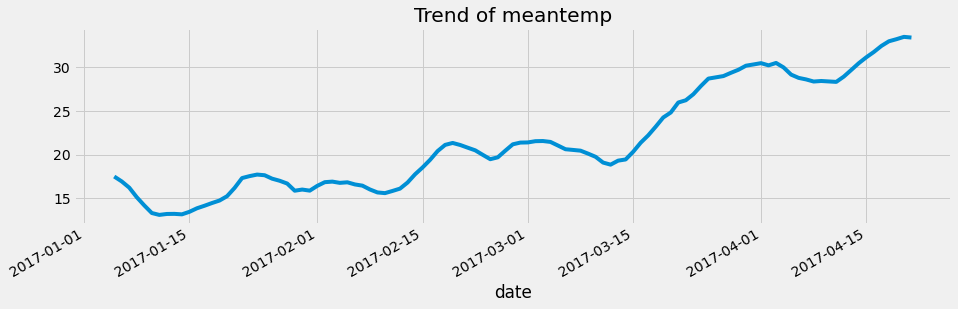

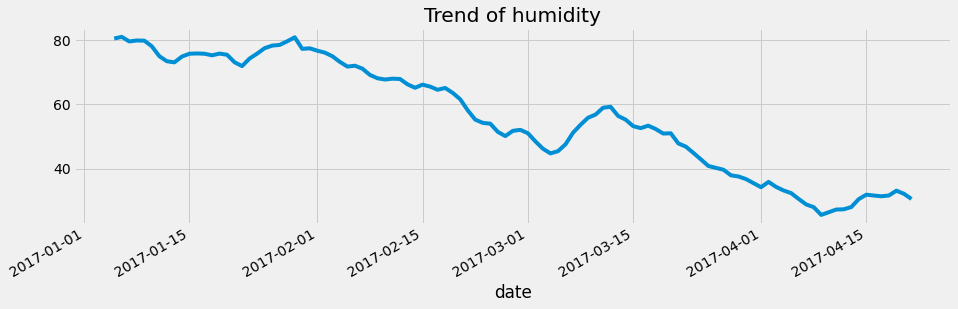

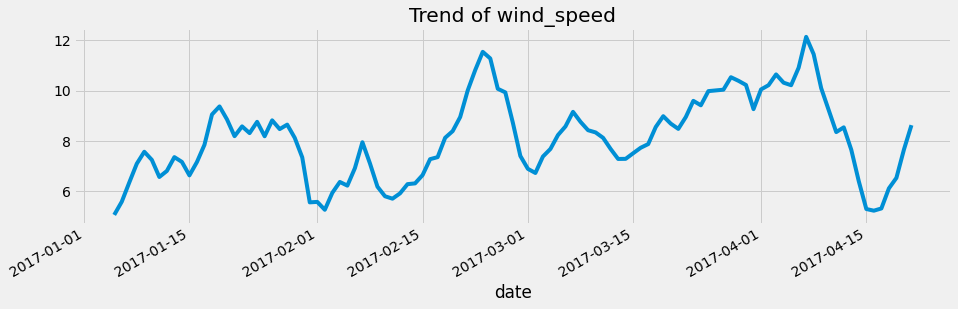

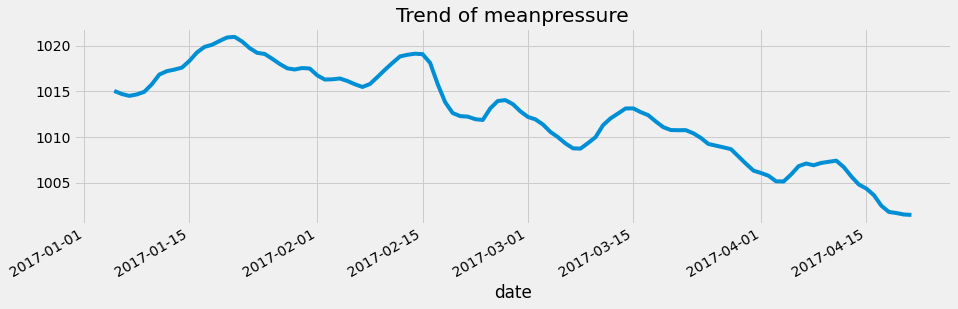

In [50]:
dict_trend = {}

for ts in dict_names:
    dict_trend[ts] = dict_delhi[ts].trend
    ax = dict_trend[ts].plot(figsize=(14,4))
    ax.set_title('Trend of {}'.format(ts))
    plt.show()

As can be seen in the graphs above, the daily mean temperature was in the increment trend as the summer approaching whereas the daily humidity and mean pressure showed decreasing trend. Meanwhile, it looks like there was a lot of noise (irregular influences that could not be attributed to either trend or seasonality) in the wind speed variable.

## Correlations Between Variables

Based on the trend analysis previously, it seems there might be a strong correlation between variables' trend. Let's find out if there was any.

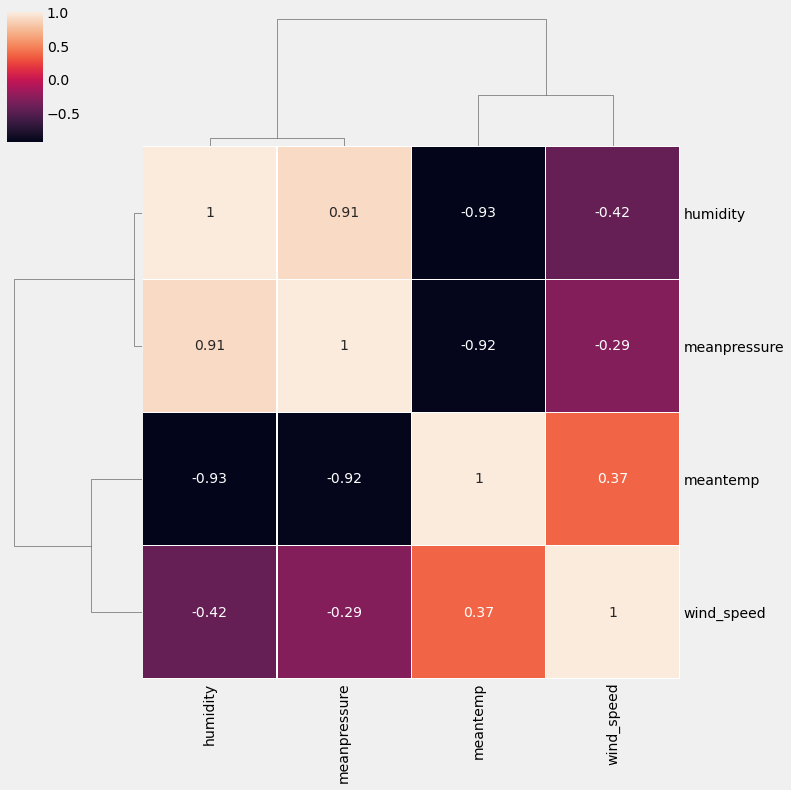

In [52]:
#Convert trend componets into a dataframe
trend_df = pd.DataFrame.from_dict(dict_trend)

#Get a correlation matrix of the trend_df
trend_corr = trend_df.corr(method='pearson')

#Customize the clustermap of the trend_corr correlation matrix
fig = sns.clustermap(trend_corr, annot=True, linewidth=0.4)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

The decreasing trends of humidity and mean pressure were strongly positive correlated with each other. It was a little bit odd since the air pressure was supposedly decreases when the humidity increases (more water vapor in the air will lower the air density). Another correlation that was a little bit odd was the strong negative correlation between mean temperature and mean pressure. Perhaps these correlations were affected by the wind_speed values.

The strong negative correlation between humidity trend and mean temperature trend was in good agreement with the fact that whenever the temperature decreases, the air will become wet thus the relative humidity will increases. To achieve more accurate analysis, there should be more observations made. 